In [1]:
from src.katech import KATECHDetection
import json
import os
from src.utils import draw_patches
import numpy as np
from PIL import Image
%matplotlib inline

In [2]:
katech = KATECHDetection.load('katech_ckpt5.pkl')

In [3]:
img_dirs = [img[0] for key, img in katech.images.items()]

In [4]:
print(katech.img_folder)
katech.change_imgdir('/home/dklee/data/KATECH')
print(katech.img_folder)

/data/KATECH
14811
/home/dklee/data/KATECH


In [31]:
katech_all = '/home/dklee/data/KATECH/annotations/instances_all2021.json'
with open(katech_all) as f:
    katech_all_dict = json.load(f)
label_map = {a['id']:a['name'] for a in katech_all_dict['categories']}
image_map = {a['id']:a['file_name'] for a in katech_all_dict['images']}

In [7]:
import pandas as pd
df = pd.DataFrame.from_dict(katech_all_dict['categories'])
df[0]

,supercategory,id,name
0,TBD,0,background
1,TBD,1,Vehicle_Car
2,TBD,2,Vehicle_Unknown
3,TBD,3,Vehicle_Bus
4,TBD,4,TrafficSign_Else
5,TBD,5,RoadMark_Character
6,TBD,6,RoadMarkArrow_Straight
7,TBD,7,RoadMarkArrow_Else
8,TBD,8,Vehicle_Motorcycle
9,TBD,9,TrafficSign_Speed


In [35]:
def annotations_filter(filter_key: 'category id', size_th = 10000):
    return [item for item in katech_all_dict['annotations'] 
            if item['category_id']==filter_key and 
            item['bbox'][3]*item['bbox'][2] > size_th]

In [9]:
roadmark_uturn = annotations_filter(22)
vehicle_bus = annotations_filter(3)

In [33]:
pd_bicycle = annotations_filter(21)
len(pd_bicycle)

18

In [32]:
len(vehicle_bus)

4736

In [49]:
savedir = '/home/dklee/data/KATECH/patch_large'
for i in range(30):
    save_subdir = os.path.join(savedir, str(i)) 
    cname = label_map[i]
    cnt = 0
    for obj in annotations_filter(i, 10000):
        _, patch = katech.get_patch(obj)
        fn = '_'.join([image_map[obj['image_id']][:-4], str(obj['id'])]) + '.png'
        with open(os.path.join(save_subdir,fn), 'wb') as f:
            patch.save(f)
        cnt += 1



In [45]:
_, patch = katech.get_patch(obj)

In [47]:
print(patch)

<PIL.Image.Image image mode=RGB size=86x148 at 0x7FD3FCDBF320>


In [20]:
from matplotlib.pyplot import imshow

In [28]:
print(bus_imgs[0][1])


<PIL.Image.Image image mode=RGB size=219x80 at 0x7FD3FEEA1198>


In [78]:
katech.change_imgdir('/home/dklee/data/KATECH')

In [8]:
katech[0]

(<PIL.Image.Image image mode=RGB size=1920x1080 at 0x7F5EC31070F0>,
 0,
 (1920, 1080),
 tensor([[0.1797, 0.5324, 0.3448, 0.7463],
         [0.3443, 0.5250, 0.4271, 0.6481],
         [0.4208, 0.5454, 0.4542, 0.6000],
         [0.4609, 0.5361, 0.4844, 0.5704],
         [0.4719, 0.5102, 0.4911, 0.5565],
         [0.4891, 0.5028, 0.5078, 0.5537],
         [0.5130, 0.4611, 0.5802, 0.6343],
         [0.5797, 0.5102, 0.5906, 0.5769],
         [0.4135, 0.5046, 0.4422, 0.5602],
         [0.2594, 0.4954, 0.2896, 0.5343],
         [0.2885, 0.4833, 0.3021, 0.5176],
         [0.3349, 0.4843, 0.3505, 0.5130],
         [0.3161, 0.5324, 0.3536, 0.5972],
         [0.4417, 0.5250, 0.4542, 0.5537],
         [0.2969, 0.5046, 0.3099, 0.5278],
         [0.5073, 0.5046, 0.5130, 0.5630],
         [0.4422, 0.4991, 0.4620, 0.5426]]),
 tensor([1, 1, 1, 1, 2, 2, 2, 2, 3, 2, 2, 3, 1, 1, 2, 2, 2]))

In [9]:
import torch

In [11]:
img, _, _, bb, lbl = katech[1]
print(img)

<PIL.Image.Image image mode=RGB size=1920x1080 at 0x7F5EC103DB38>


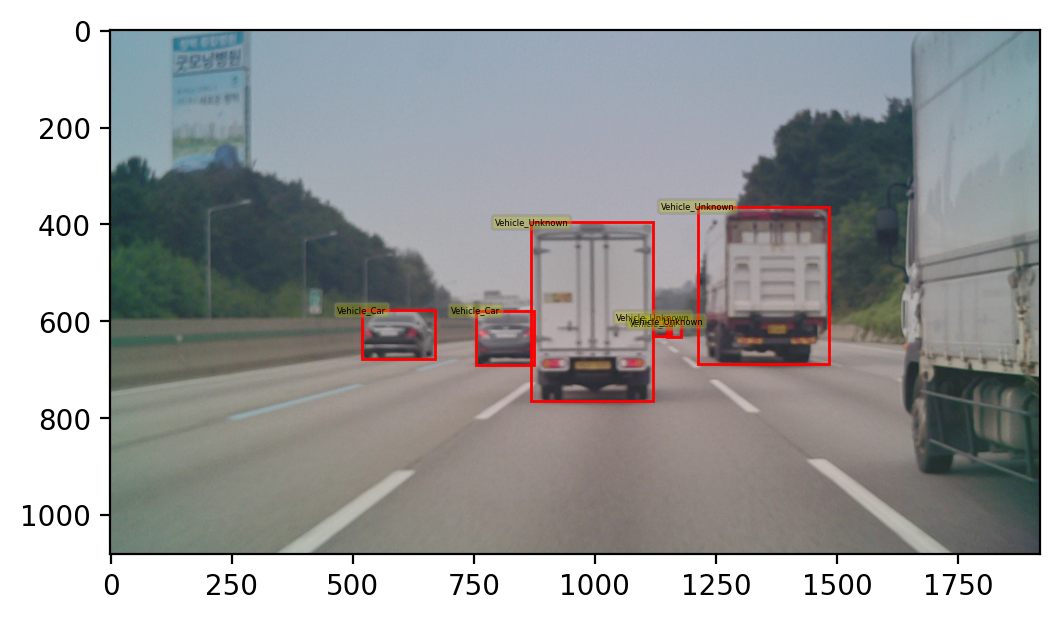

In [12]:
draw_patches(img, bb, lbl, 'ltrb', label_map=label_map)

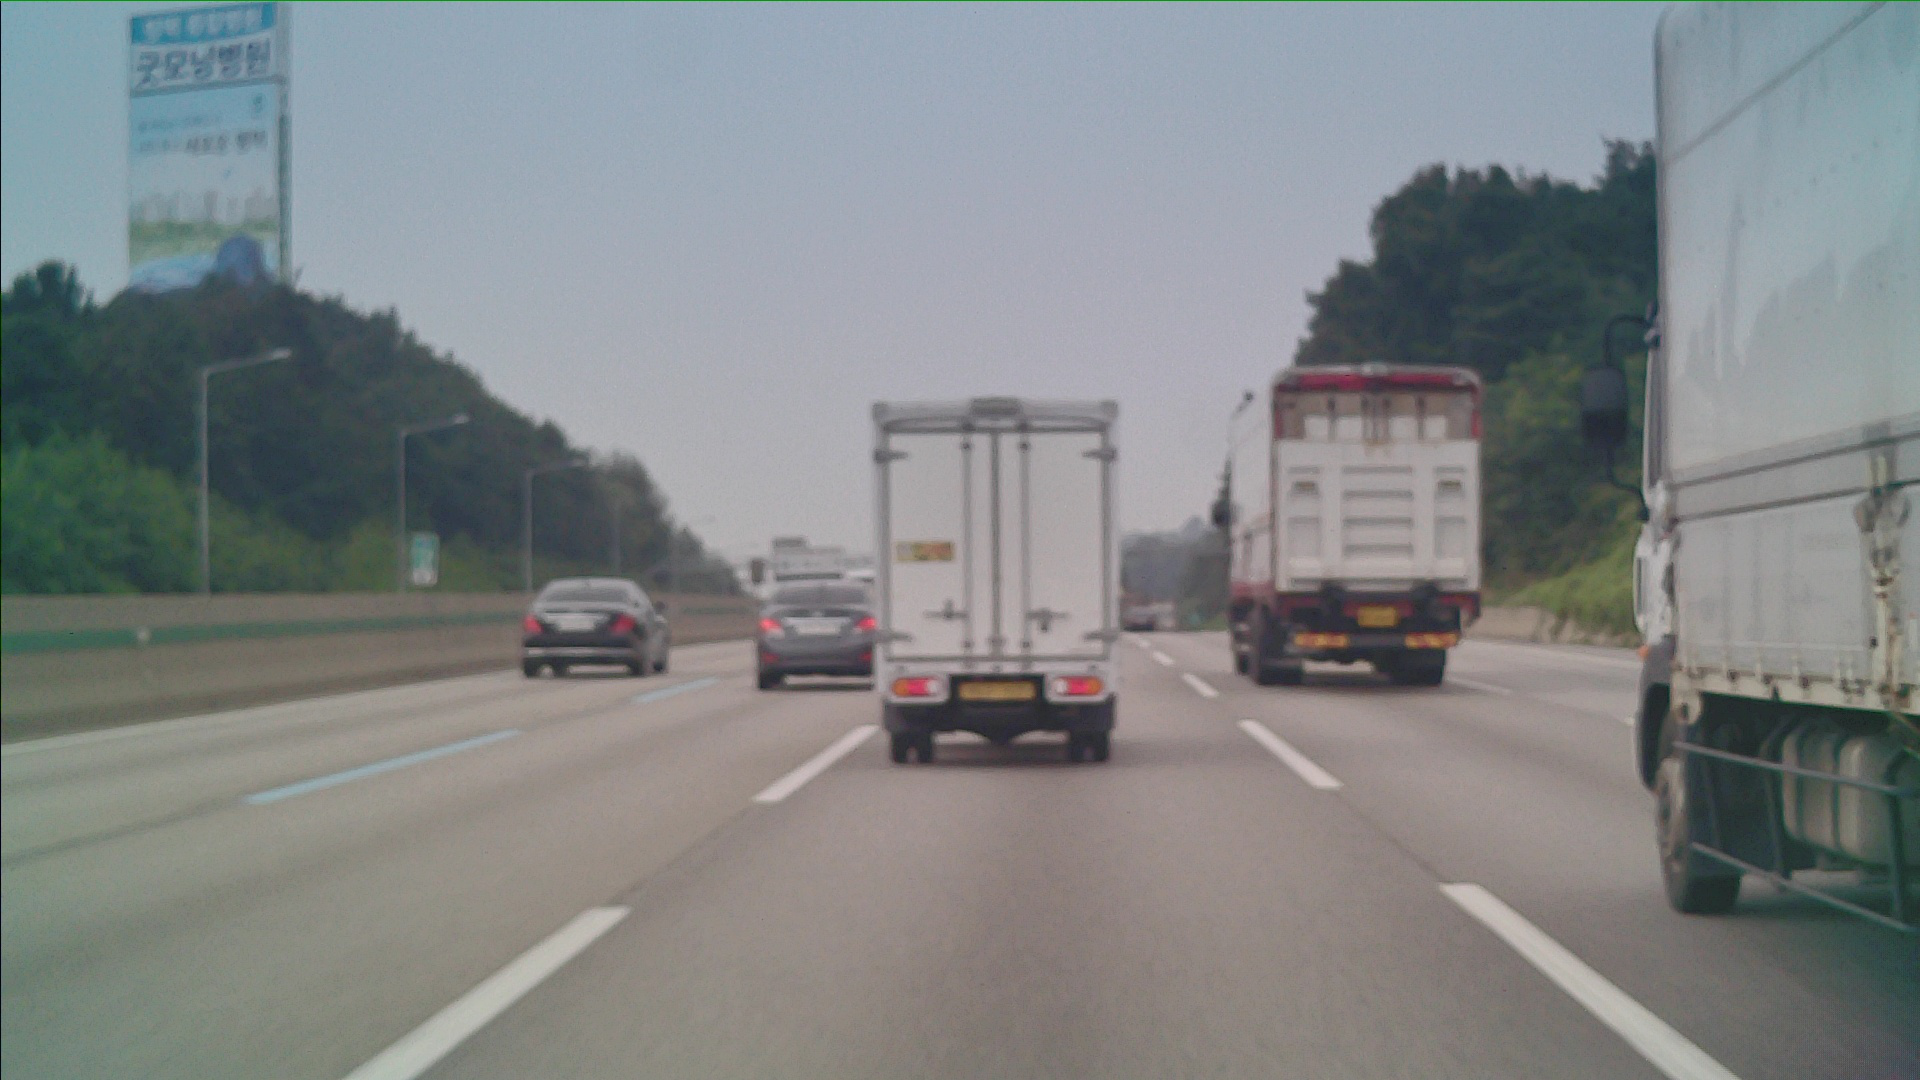

In [16]:
img

In [20]:
katech.images[0]

('/home/dklee/data/KATECH/성선영/01. 자동차전용도로_1차_성선영/20190821_134810/1/1_20190821_134810_690.jpg',
 (1920, 1080),
 [(0.1796875, 0.5324074074074074, 0.34479166666666666, 0.7462962962962963),
  (0.34427083333333336, 0.525, 0.4270833333333333, 0.6481481481481481),
  (0.42083333333333334, 0.5453703703703704, 0.45416666666666666, 0.6),
  (0.4609375, 0.5361111111111111, 0.484375, 0.5703703703703704),
  (0.471875, 0.5101851851851852, 0.49114583333333334, 0.5564814814814815),
  (0.4890625, 0.5027777777777778, 0.5078125, 0.5537037037037037),
  (0.5130208333333334,
   0.46111111111111114,
   0.5802083333333333,
   0.6342592592592593),
  (0.5796875, 0.5101851851851852, 0.590625, 0.5768518518518518),
  (0.41354166666666664, 0.5046296296296297, 0.4421875, 0.5601851851851852),
  (0.259375, 0.49537037037037035, 0.28958333333333336, 0.5342592592592592),
  (0.28854166666666664,
   0.48333333333333334,
   0.3020833333333333,
   0.5175925925925926),
  (0.33489583333333334,
   0.4842592592592593,
   0.3505208

In [24]:
katech_traffic = [img for img in katech.images if 'RoadMark_Number' in img[3]]

TypeError: 'int' object is not subscriptable

In [24]:
for i in range (7,30):
    os.mkdir('/home/dklee/data/KATECH/patch/' + str(i))